<a href="https://colab.research.google.com/github/kkimhaji/FlyAI/blob/main/Deep%20Learning/RNN/21_rnn_samsung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 데이터

In [62]:
samsung = pd.read_csv('samsung.csv')
samsung.shape

(5779, 7)

In [63]:
samsung.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.915039,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.599609,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.661621,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.537109,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.390625,46880000


In [64]:
# 보통 시계열 데이터를 다룰 때: 날짜가 index로 잡히는 게 좋다
df = samsung.copy()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.915039,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.599609,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.661621,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.537109,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.390625,46880000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779 entries, 0 to 5778
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5779 non-null   object 
 1   Open       5779 non-null   float64
 2   High       5779 non-null   float64
 3   Low        5779 non-null   float64
 4   Close      5779 non-null   float64
 5   Adj Close  5779 non-null   float64
 6   Volume     5779 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 316.2+ KB


In [66]:
df['Date'] = pd.to_datetime(df['Date'])
# string -> 시간 자료형
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779 entries, 0 to 5778
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5779 non-null   datetime64[ns]
 1   Open       5779 non-null   float64       
 2   High       5779 non-null   float64       
 3   Low        5779 non-null   float64       
 4   Close      5779 non-null   float64       
 5   Adj Close  5779 non-null   float64       
 6   Volume     5779 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 316.2 KB


In [67]:
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.915039,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.599609,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.661621,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.537109,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.390625,46880000


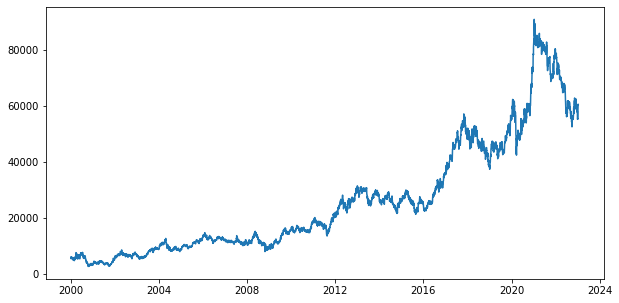

In [68]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close']) #line plot
plt.show()

In [69]:
# feature 추가
#3일 평균
df['MA3'] = np.around(df['Close'].rolling(window=3).mean(), 0) # 0: 소수점 날림
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA3
Date,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.915039,74195000,NaN
2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.599609,74680000,NaN
2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.661621,54390000,5770.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.537109,40305000,5580.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.390625,46880000,5643.0


In [70]:
# 5일 평균
df['MA5'] = np.around(df['Close'].rolling(window=5).mean(), 0)
# 중간값
df['Mid']= (df['High'] + df['Low'])/2

df.head()

,Open,High,Low,Close,Adj Close,Volume,MA3,MA5,Mid
Date,,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.915039,74195000,NaN,NaN,5885.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.599609,74680000,NaN,NaN,5790.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.661621,54390000,5770.0,NaN,5680.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.537109,40305000,5580.0,NaN,5515.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.390625,46880000,5643.0,5724.0,5675.0


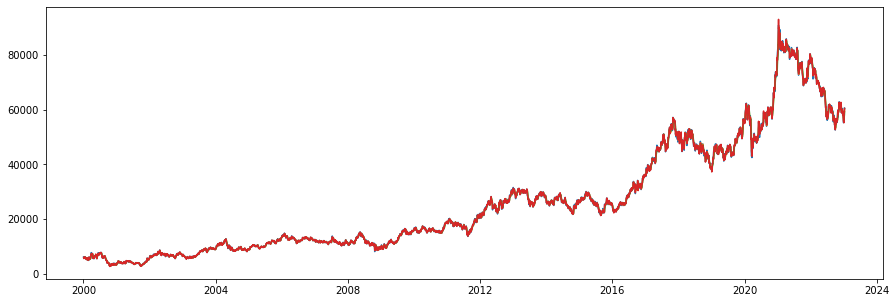

In [71]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Close']) #line plot
plt.plot(df.index, df['MA3'])
plt.plot(df.index, df['MA5'])
plt.plot(df.index, df['Mid'])
plt.show()

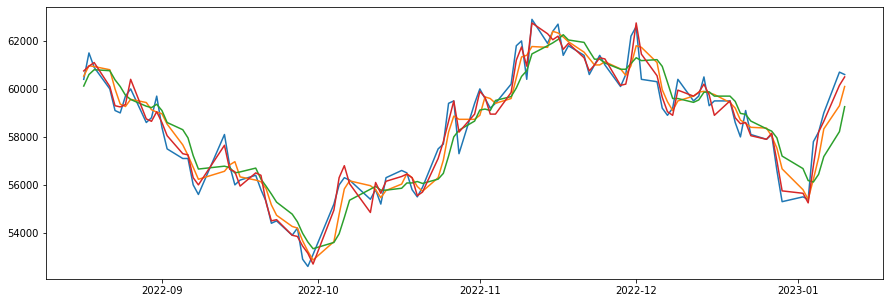

In [73]:
x = df.iloc[-100:, :]

plt.figure(figsize=(15,5))
plt.plot(x.index, x['Close']) #line plot
plt.plot(x.index, x['MA3'])
plt.plot(x.index, x['MA5'])
plt.plot(x.index, x['Mid'])
plt.show()

In [74]:
# 결손치
df.isna().sum(axis=0)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA3          2
MA5          4
Mid          0
dtype: int64

In [75]:
df.loc[df['Volume'] ==0]

,Open,High,Low,Close,Adj Close,Volume,MA3,MA5,Mid
Date,,,,,,,,,
2000-02-04,5130.0,5130.0,5130.0,5130.0,3855.405518,0,5170.0,5282.0,5130.0
2000-03-01,5120.0,5120.0,5120.0,5120.0,3847.889893,0,5013.0,5046.0,5120.0
2000-04-05,6800.0,6800.0,6800.0,6800.0,5110.478516,0,6900.0,6890.0,6800.0
2000-04-13,6910.0,6910.0,6910.0,6910.0,5193.147461,0,6973.0,7084.0,6910.0
2000-05-01,6000.0,6000.0,6000.0,6000.0,4509.246582,0,5800.0,5728.0,6000.0
...,...,...,...,...,...,...,...,...,...
2022-02-28,71900.0,71900.0,71900.0,71900.0,70610.367188,0,71767.0,72780.0,71900.0
2022-03-04,72900.0,72900.0,72900.0,72900.0,71592.429688,0,72500.0,72260.0,72900.0
2022-03-10,69500.0,69500.0,69500.0,69500.0,68253.414063,0,69700.0,70980.0,69500.0


In [76]:
df['Volume'] = df['Volume'].replace(0, np.nan)

In [79]:
df.isna().sum(axis=0)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA3          0
MA5          0
Mid          0
dtype: int64

In [78]:
df = df.dropna()

In [80]:
# 정규화 min-max (음수가 없어서)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head()

,Open,High,Low,Close,Adj Close,Volume,MA3,MA5,Mid
0,0.034868,0.032008,0.036288,0.034440,0.026655,0.285359,0.032553,0.033215,0.034066
1,0.037375,0.035517,0.038470,0.034440,0.026655,0.363715,0.033123,0.032434,0.036937
2,0.034982,0.031689,0.036518,0.033873,0.026217,0.177799,0.033808,0.032756,0.034011
3,0.034868,0.031689,0.036059,0.033760,0.026129,0.250704,0.033579,0.032962,0.033790
4,0.036235,0.033177,0.037437,0.035120,0.027181,0.300555,0.033808,0.033628,0.035225


In [81]:
def make_sequence_dataset(X, y, window_size):
  feature_list = []
  label_list = []

  for i in range(len(X)-window_size):
    feature_list.append(X[i:i+window_size])
    label_list.append(y[i+window_size])

  return np.array(feature_list), np.array(label_list)

In [82]:
X = df_scaled.drop(['Close', 'Adj Close'], axis=1)
y = df_scaled['Close']

In [83]:
X_data, y_data = make_sequence_dataset(X, y, 20)
print(X_data.shape, y_data.shape)

(5628, 20, 7) (5628,)


In [84]:
train_size = int(len(X_data) * 0.8)
train_size

4502

In [85]:
X_train = X_data[:train_size]
X_test= X_data[train_size:]

y_train = y_data[:train_size]
y_test = y_data[train_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4502, 20, 7), (1126, 20, 7), (4502,), (1126,))

## 모델 

In [86]:
model = keras.Sequential([])
model.add(layers.LSTM(32, activation='tanh',
                      input_shape=(20, 7))) #hyperbolic tangent - sigmoid 선형 변형
#끝~
model.add(layers.Dense(1)) #activation은 넣지 않아도 됨 <- 연속적인 숫자값 하나만 얻으면 되기 때문에'

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 32)                5120      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(
    loss = 'mse', #회귀
    optimizer = 'rmsprop', # adam 써도 됨
    metrics=['mae']
)

In [88]:
EPOCHS = 100
BATCH_SIZE = 32

log = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, verbose=1, validation_split=0.2)

Epoch 1/100
113/113 [==============================] - 3s 10ms/step - loss: 0.0019 - mae: 0.0204 - val_loss: 0.0023 - val_mae: 0.0428
Epoch 2/100
113/113 [==============================] - 1s 7ms/step - loss: 1.9405e-04 - mae: 0.0102 - val_loss: 0.0011 - val_mae: 0.0287
Epoch 3/100
113/113 [==============================] - 1s 7ms/step - loss: 1.3739e-04 - mae: 0.0087 - val_loss: 2.7379e-04 - val_mae: 0.0120
Epoch 4/100
113/113 [==============================] - 1s 7ms/step - loss: 1.0003e-04 - mae: 0.0073 - val_loss: 2.5602e-04 - val_mae: 0.0116
Epoch 5/100
113/113 [==============================] - 1s 7ms/step - loss: 7.6622e-05 - mae: 0.0066 - val_loss: 4.7103e-04 - val_mae: 0.0163
Epoch 6/100
113/113 [==============================] - 1s 7ms/step - loss: 6.9477e-05 - mae: 0.0065 - val_loss: 3.0029e-04 - val_mae: 0.0126
Epoch 7/100
113/113 [==============================] - 1s 7ms/step - loss: 5.4907e-05 - mae: 0.0056 - val_loss: 2.8329e-04 - val_mae: 0.0120
Epoch 8/100
113/113 [===

In [39]:
log.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [91]:
# 학습 곡선
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['mae'],label='Train MAE')
    plt.plot(hist['epoch'], hist['val_mae'],label = 'Val MAE')

    plt.legend()
    plt.show()

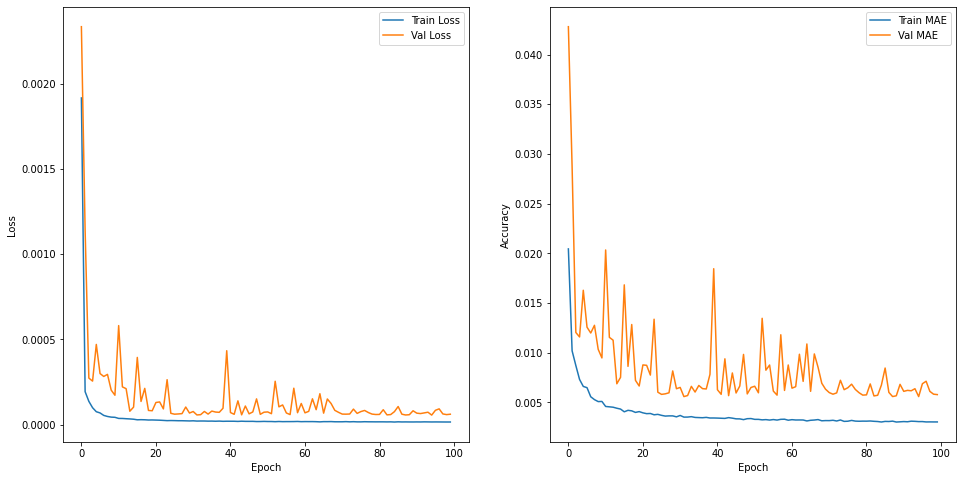

In [92]:
plot_history(log)

In [93]:
model.evaluate(X_train, y_train)

141/141 [==============================] - 0s 2ms/step - loss: 2.2269e-05 - mae: 0.0032


[2.2269026885624044e-05, 0.0032478340435773134]

In [94]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1)

36/36 [==============================] - 0s 2ms/step


In [95]:
for i in range(10):
  print('Answer: ', y_test[i], 'Pred', y_pred[i])

Answer:  0.5615724481703863 Pred 0.55536556
Answer:  0.5502435708621276 Pred 0.55692947
Answer:  0.5298515917072618 Pred 0.54687166
Answer:  0.5434462444771724 Pred 0.52421576
Answer:  0.5502435708621276 Pred 0.5380669
Answer:  0.5479777954004759 Pred 0.54242295
Answer:  0.5502435708621276 Pred 0.5421799
Answer:  0.5423133567463465 Pred 0.53910804
Answer:  0.5315509233035006 Pred 0.54333556
Answer:  0.5343831426305653 Pred 0.5237371


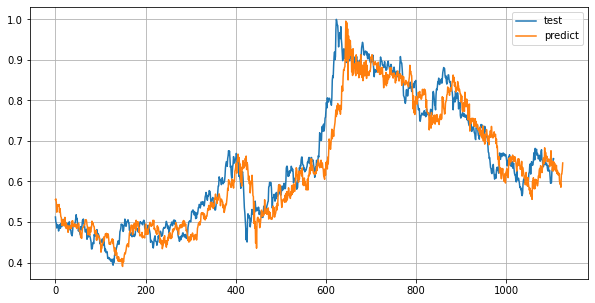

In [96]:
plt.figure(figsize=(10,5))
plt.plot(y_test[20:], label='test')
plt.plot(y_pred, label='predict')
plt.grid()
plt.legend()
plt.show()

## Stack **LSTM**

In [97]:
model = keras.Sequential([])
model.add(layers.LSTM(32, activation='tanh',
                      input_shape=(20, 7), return_sequences = True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(32, activation='tanh'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 20, 32)            5120      
                                                                 
 dropout_2 (Dropout)         (None, 20, 32)            0         
                                                                 
 lstm_6 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,473
Trainable params: 13,473
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.compile(
    loss = 'mse', #회귀
    optimizer = 'rmsprop', # adam 써도 됨
    metrics=['mae']
)

In [99]:
EPOCHS = 100
BATCH_SIZE = 32

log = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, verbose=1, validation_split=0.2)

Epoch 1/100
113/113 [==============================] - 7s 29ms/step - loss: 8.8904e-04 - mae: 0.0207 - val_loss: 3.4786e-04 - val_mae: 0.0141
Epoch 2/100
113/113 [==============================] - 2s 14ms/step - loss: 4.5531e-04 - mae: 0.0153 - val_loss: 9.1493e-04 - val_mae: 0.0276
Epoch 3/100
113/113 [==============================] - 2s 14ms/step - loss: 3.6465e-04 - mae: 0.0134 - val_loss: 0.0021 - val_mae: 0.0391
Epoch 4/100
113/113 [==============================] - 2s 14ms/step - loss: 2.9309e-04 - mae: 0.0121 - val_loss: 2.8660e-04 - val_mae: 0.0136
Epoch 5/100
113/113 [==============================] - 2s 14ms/step - loss: 2.6786e-04 - mae: 0.0116 - val_loss: 8.7094e-04 - val_mae: 0.0229
Epoch 6/100
113/113 [==============================] - 2s 14ms/step - loss: 2.3878e-04 - mae: 0.0108 - val_loss: 7.1937e-04 - val_mae: 0.0193
Epoch 7/100
113/113 [==============================] - 2s 13ms/step - loss: 2.2434e-04 - mae: 0.0104 - val_loss: 0.0018 - val_mae: 0.0346
Epoch 8/100
11

In [100]:
# 학습 곡선
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['mae'],label='Train MAE')
    plt.plot(hist['epoch'], hist['val_mae'],label = 'Val MAE')

    plt.legend()
    plt.show()

In [101]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1)

36/36 [==============================] - 1s 3ms/step


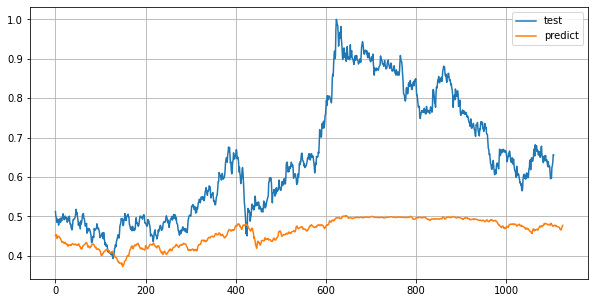

In [102]:
plt.figure(figsize=(10,5))
plt.plot(y_test[20:], label='test')
plt.plot(y_pred, label='predict')
plt.grid()
plt.legend()
plt.show()

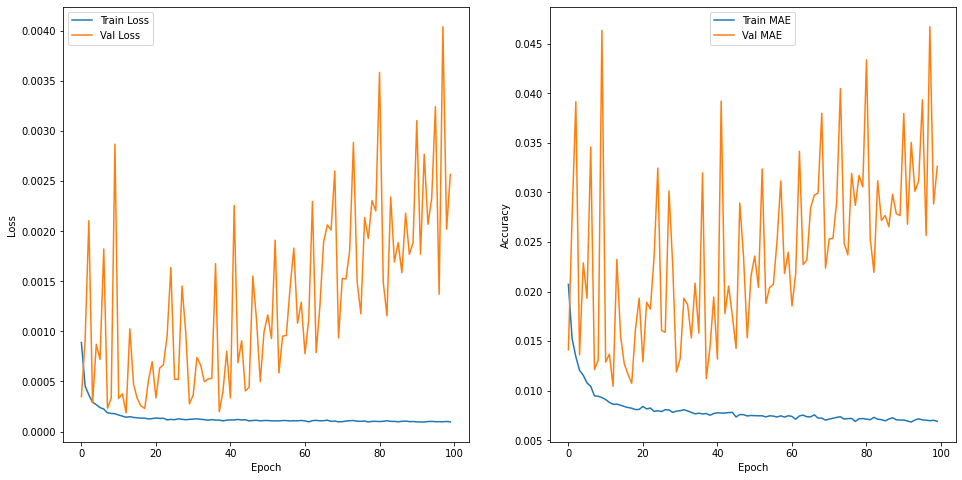

In [103]:
plot_history(log)